In [1044]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from numpy import cov
import seaborn as sns
import sklearn.cluster as cluster   

#read the dataset 
df_CO2emission = pd.read_excel("CO2 emissions (kt).xls")
df_CO2emission_gF_consumption = pd.read_excel("CO2 emissions from gaseous fuel consumption (kt) .xls")
df_CO2emission_lF_consumption = pd.read_excel("CO2 emissions from liquid fuel consumption (kt) .xls")
df_CO2emission_sF_consumption = pd.read_excel("CO2 emissions from solid fuel consumption (% of total).xls")
df_ForestArea = pd.read_excel("Forest area.xls")
df_Population = pd.read_excel("Population growth.xls")

In [1045]:
#Select different countries from CO2 Emission
slt_UK_CO2     = df_CO2emission.loc[df_CO2emission['Country Name'] == 'United Kingdom']
slt_China_CO2  = df_CO2emission.loc[df_CO2emission['Country Name'] == 'China']
#slt_Spain_CO2  = df_CO2emission.loc[df_CO2emission['Country Name'] == 'Spain']
#slt_Poland_CO2 = df_CO2emission.loc[df_CO2emission['Country Name'] == 'Poland']
slt_World_CO2  = df_CO2emission.loc[df_CO2emission['Country Name'] == 'World']
slt_USA_CO2  = df_CO2emission.loc[df_CO2emission['Country Name'] == 'United States']

In [1046]:
#Select different countries forest area
slt_UK_FA     = df_ForestArea.loc[df_ForestArea['Country Name'] == 'United Kingdom']
slt_China_FA  = df_ForestArea.loc[df_ForestArea['Country Name'] == 'China']
#slt_Spain_FA  = df_ForestArea.loc[df_ForestArea['Country Name'] == 'Spain']
#slt_Poland_FA = df_ForestArea.loc[df_ForestArea['Country Name'] == 'Poland']
slt_World_FA  = df_ForestArea.loc[df_ForestArea['Country Name'] == 'World']
slt_USA_FA  = df_ForestArea.loc[df_ForestArea['Country Name'] == 'United States']

In [1047]:
slt_UK_tr     = slt_UK_CO2.transpose() #transpose the raw with country name United Kingdom
slt_China_tr  = slt_China_CO2.transpose() #transpose the raw with country name China
#slt_Spain_tr  = slt_Spain_CO2.transpose() #transpose the raw with country name Spain
#slt_Poland_tr = slt_Poland_CO2.transpose() #transpose the raw with country name Poland
slt_USA_tr    = slt_USA_CO2.transpose()
slt_World_CO2_tr  = slt_World_CO2.transpose() #transpose the world data

In [1048]:
# transpose the forestarea data of each country and world 
slt_UK_FA_tr    = slt_UK_FA.transpose()
slt_China_FA_tr = slt_China_FA.transpose()
#slt_Spain_FA_tr = slt_Spain_FA.transpose()
#slt_Poland_FA_tr= slt_Poland_FA.transpose()
slt_World_FA_tr = slt_World_FA.transpose()
slt_USA_FA_tr   = slt_USA_FA.transpose()

In [1049]:
def drop_raw(df):
    df.drop(labels=["Country Code","Indicator Name", "Indicator Code",'2019','2020'], 
                               inplace = True, axis = 0) # drop the raws
    return df

In [1050]:
drop_raw(slt_USA_tr)
drop_raw(slt_UK_tr)
drop_raw(slt_China_tr)
#drop_raw(slt_Spain_tr)
#drop_raw(slt_Poland_tr)
drop_raw(slt_World_CO2_tr) 

,259
Country Name,World
1960,9463838.499902
1961,9423934.423683
1962,9732505.890225
1963,10274503.991073
1964,10820253.007307
1965,11402575.20168
1966,11988321.416101
1967,12413351.889943
1968,13087346.571295


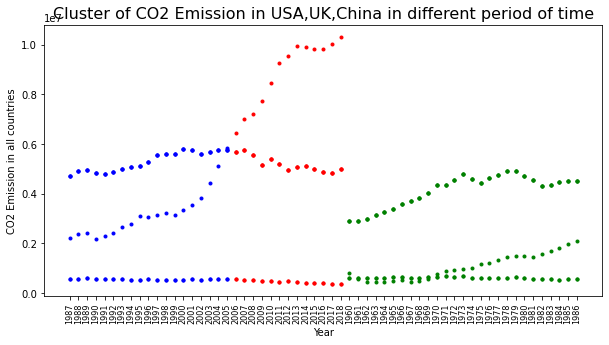

In [1051]:

Clu_slt_CO2 = pd.concat([slt_USA_tr, slt_UK_tr,slt_China_tr], axis=1)  

#set the header
new_header = Clu_slt_CO2.iloc[0] #grab the first row for the header
Clu_slt_CO2 = Clu_slt_CO2[1:] #take the data less the header row
Clu_slt_CO2.columns = new_header

########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Clu_slt_CO2) # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres

#plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_CO2.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    plt.plot(Clu_slt_CO2.iloc[: , :2][labels==l], "o", markersize=3, color=col[l])
    plt.plot(Clu_slt_CO2.iloc[: , :3][labels==l], "o", markersize=3, color=col[l])
    #plt.plot(Clu_slt_CO2.iloc[: , :4][labels==l], "o", markersize=3, color=col[l])
    #plt.plot(Clu_slt_CO2.iloc[: , :5][labels==l], "o", markersize=3, color=col[l])
    
plt.title("Cluster of CO2 Emission in USA,UK,China in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year")
plt.ylabel("CO2 Emission in all countries")
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Converged after 29 iterations.


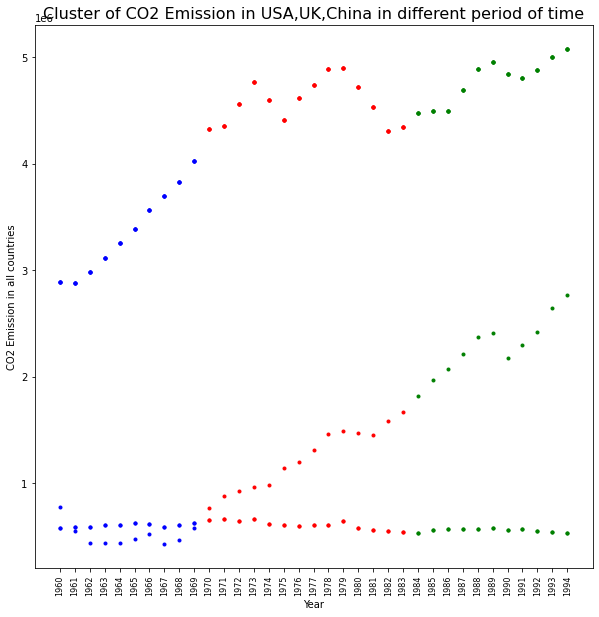

In [1052]:
###########################       AffinityPropagation    ###############################
# set up the clusterer
ap = cluster.AffinityPropagation(max_iter=10000, verbose=True)
# preference=-5  Preferences for each point - points with larger values of preferences are more 
# likely to be chosen as exemplars. Influences the number of clusters

# runnig it
ap.fit(Clu_slt_CO2)

# extract labels and centres
labels = ap.labels_
cen = ap.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(10.0,10.0))

col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_USA_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    plt.plot(Clu_slt_CO2.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    plt.plot(Clu_slt_CO2.iloc[: , :2][labels==l], "o", markersize=3, color=col[l])
    plt.plot(Clu_slt_CO2.iloc[: , :3][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)
plt.title("Cluster of CO2 Emission in USA,UK,China in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)   
plt.xlabel("Year")
plt.ylabel("CO2 Emission in all countries")
plt.show()

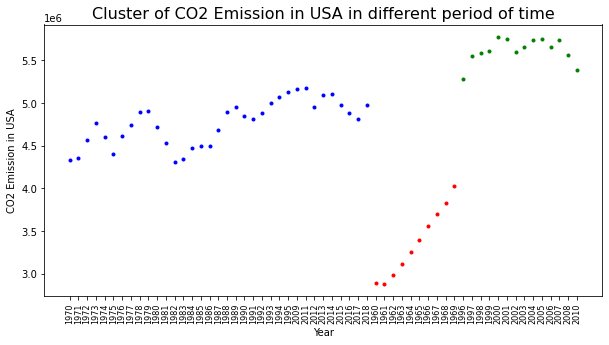

In [1053]:
Clu_slt_USA_tr = slt_USA_tr
#set the header
new_header = Clu_slt_USA_tr.iloc[0] #grab the first row for the header
Clu_slt_USA_tr = Clu_slt_USA_tr[1:] #take the data less the header row
Clu_slt_USA_tr.columns = new_header
########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Clu_slt_USA_tr) 
       # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres
# plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green","purple"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_USA_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])

plt.title("Cluster of CO2 Emission in USA in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year")
plt.ylabel("CO2 Emission in USA")
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Converged after 40 iterations.


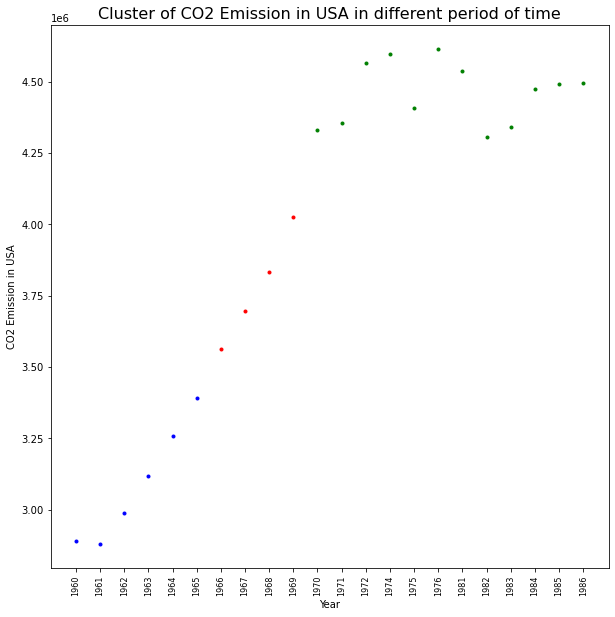

In [1054]:
###########################       AffinityPropagation    ###############################
# set up the clusterer
ap = cluster.AffinityPropagation(max_iter=10000, verbose=True)
# preference=-5  Preferences for each point - points with larger values of preferences are more 
# likely to be chosen as exemplars. Influences the number of clusters

# runnig it
ap.fit(Clu_slt_USA_tr)

# extract labels and centres
labels = ap.labels_
cen = ap.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(10.0,10.0))

col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_USA_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)
plt.title("Cluster of CO2 Emission in USA in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)   
plt.xlabel("Year")
plt.ylabel("CO2 Emission in USA")
plt.show()

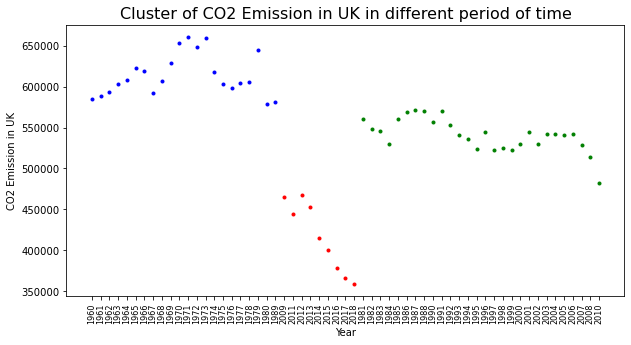

In [963]:
Clu_slt_UK_tr = slt_UK_tr
#set the header
new_header = Clu_slt_UK_tr.iloc[0] #grab the first row for the header
Clu_slt_UK_tr = Clu_slt_UK_tr[1:] #take the data less the header row
Clu_slt_UK_tr.columns = new_header
########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Clu_slt_UK_tr) 
       # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres
# plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green","purple"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_UK_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Cluster of CO2 Emission in UK in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year")
plt.ylabel("CO2 Emission in UK")
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Converged after 31 iterations.


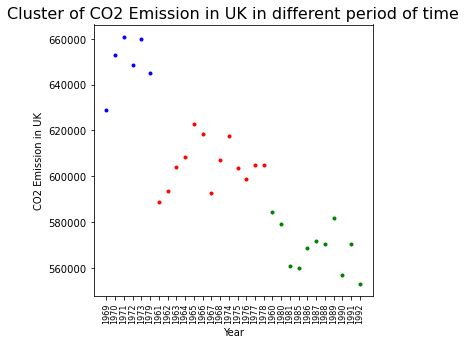

In [964]:
###########################    AffinityPropagation    ###############################
# set up the clusterer
ap = cluster.AffinityPropagation(max_iter=10000, verbose=True)
# preference=-5  Preferences for each point - points with larger values of preferences are more 
# likely to be chosen as exemplars. Influences the number of clusters

# runnig it
ap.fit(Clu_slt_UK_tr)

# extract labels and centres
labels = ap.labels_
cen = ap.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_UK_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)
plt.title("Cluster of CO2 Emission in UK in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)   
plt.xlabel("Year")
plt.ylabel("CO2 Emission in UK")
plt.show()

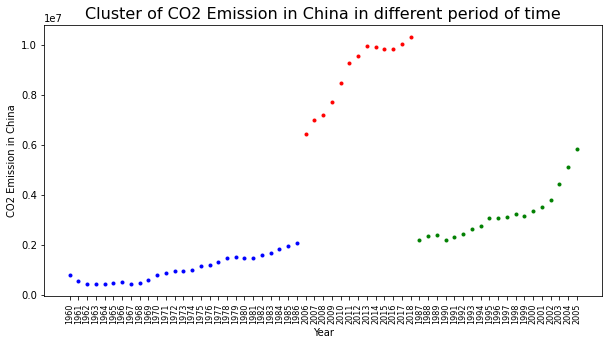

In [965]:
Clu_slt_China_tr = slt_China_tr
#set the header
new_header = Clu_slt_China_tr.iloc[0] #grab the first row for the header
Clu_slt_China_tr = Clu_slt_China_tr[1:] #take the data less the header row
Clu_slt_China_tr.columns = new_header
########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Clu_slt_China_tr) 
       # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres
# plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green","purple"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_China_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Cluster of CO2 Emission in China in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year")
plt.ylabel("CO2 Emission in China")
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Converged after 27 iterations.


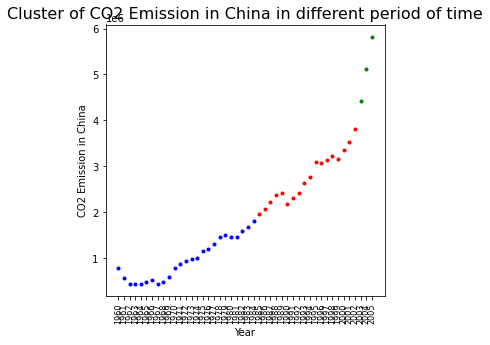

In [966]:
###########################    AffinityPropagation    ###############################
# set up the clusterer
ap = cluster.AffinityPropagation(max_iter=10000, verbose=True)
# preference=-5  Preferences for each point - points with larger values of preferences are more 
# likely to be chosen as exemplars. Influences the number of clusters

# runnig it
ap.fit(Clu_slt_China_tr)

# extract labels and centres
labels = ap.labels_
cen = ap.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_China_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)
plt.title("Cluster of CO2 Emission in China in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)   
plt.xlabel("Year")
plt.ylabel("CO2 Emission in China")
plt.show()

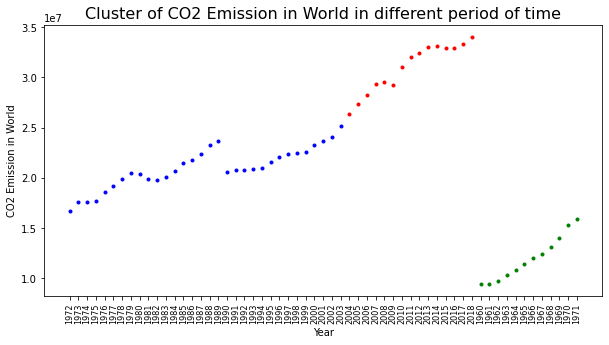

In [967]:
Clu_slt_World_CO2_tr = slt_World_CO2_tr
#set the header
new_header = Clu_slt_World_CO2_tr.iloc[0] #grab the first row for the header
Clu_slt_World_CO2_tr = Clu_slt_World_CO2_tr[1:] #take the data less the header row
Clu_slt_World_CO2_tr.columns = new_header
########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Clu_slt_World_CO2_tr) 
       # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres
# plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green","purple"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_World_CO2_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Cluster of CO2 Emission in World in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year")
plt.ylabel("CO2 Emission in World")
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Converged after 36 iterations.


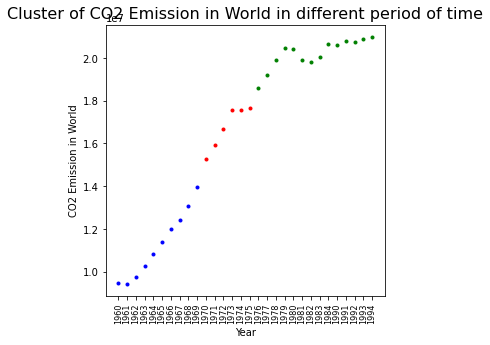

In [968]:
###########################AffinityPropagation###############################
# set up the clusterer
ap = cluster.AffinityPropagation(max_iter=10000, verbose=True)
# preference=-5  Preferences for each point - points with larger values of preferences are more 
# likely to be chosen as exemplars. Influences the number of clusters

# runnig it
ap.fit(Clu_slt_World_CO2_tr)

# extract labels and centres
labels = ap.labels_
cen = ap.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_World_CO2_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)
plt.title("Cluster of CO2 Emission in World in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)   
plt.xlabel("Year")
plt.ylabel("CO2 Emission in World")
plt.show()

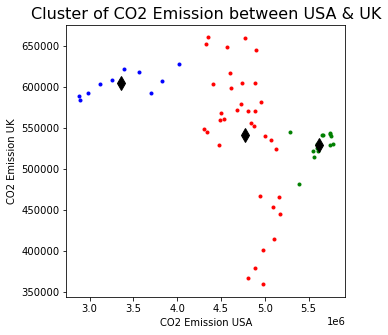

In [969]:
x = slt_USA_tr.drop(slt_USA_tr.index[[0]])
y = slt_UK_tr.drop(slt_UK_tr.index[[0]])
df_USA_UK_CO2 = pd.concat([x, y], axis=1) 
########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(df_USA_UK_CO2)              # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_                # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_          # extract the estimated cluster centres


# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))
col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
plt.title("Cluster of CO2 Emission between USA & UK",fontsize=16)  
plt.xlabel("CO2 Emission USA")
plt.ylabel("CO2 Emission UK")
plt.show()


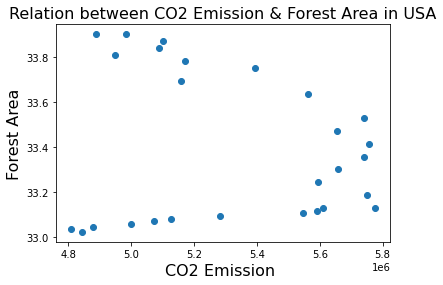

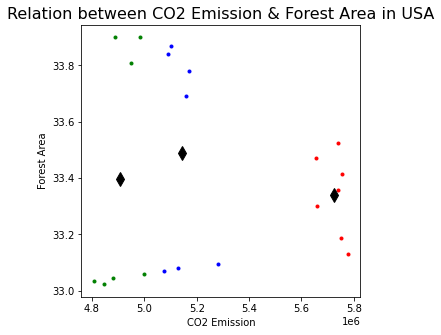

In [970]:
slt_USA_FA_tr.drop(labels=["Country Code","Indicator Name", "Indicator Code",'2019','2020'], 
                               inplace = True, axis = 0) # drop the raws

###################### Relation between USA Forest area & CO2 Emission #######################
# drop the unnecessary fields
data1_USA_CO2 = slt_USA_tr.drop(slt_USA_tr.index[range(31)]) 
data1_USA_CO2 = data1_USA_CO2.drop(data1_USA_CO2.index[[-2, -1]])
data2_USA_FA = slt_USA_FA_tr.drop(slt_USA_FA_tr.index[range(31)])
data2_USA_FA = data2_USA_FA.drop(data2_USA_FA.index[[-2, -1]])

# plot
plt.scatter(data1_USA_CO2,data2_USA_FA)
plt.title("Relation between CO2 Emission & Forest Area in USA",fontsize=16)
plt.xlabel("CO2 Emission ",fontsize=16)
plt.ylabel("Forest Area",fontsize=16)
plt.show()

#Concantenate the each data with different counties in colomnwise.
Concantenate_USA_FA = pd.concat([data1_USA_CO2, data2_USA_FA], axis=1)  
Concantenate_USA_FA

########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Concantenate_USA_FA)        # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres


# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))
col = ["blue", "red", "green","orange"]
for l in range(0,3):     # loop over the different labels
    plt.plot(data1_USA_CO2[labels==l], data2_USA_FA[labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
plt.title("Relation between CO2 Emission & Forest Area in USA",fontsize=16)  
plt.xlabel("CO2 Emission")
plt.ylabel("Forest Area")
plt.show()

# Population

In [1378]:
import scipy.optimize as opt
from numpy import sin

In [1396]:
#Select different Countries population 
slt_UK_PL     = df_Population.loc[df_Population['Country Name'] == 'United Kingdom']
slt_China_PL  = df_Population.loc[df_Population['Country Name'] == 'China']
slt_USA_PL  = df_Population.loc[df_Population['Country Name'] == 'United States']
slt_World_PL  = df_Population.loc[df_Population['Country Name'] == 'World']
slt_Syria_PL  = df_Population.loc[df_Population['Country Name'] == 'Syrian Arab Republic']

In [1397]:
def drop_PL(df):
    df.drop(labels=["Country Code","Indicator Name", "Indicator Code","1960"], 
                               inplace = True, axis = 0) #drop the unnecessary fields
    return df

In [1398]:
slt_UK_PL_tr = slt_UK_PL.transpose()
slt_USA_PL_tr = slt_USA_PL.transpose()
slt_China_PL_tr = slt_China_PL.transpose()
slt_World_PL_tr = slt_World_PL.transpose()
slt_Syria_PL_tr = slt_Syria_PL.transpose()

In [1399]:
drop_PL(slt_USA_PL_tr)
drop_PL(slt_UK_PL_tr)
drop_PL(slt_China_PL_tr)
drop_PL(slt_World_PL_tr)
drop_PL(slt_Syria_PL_tr)

,227
Country Name,Syrian Arab Republic
1961,3.192794
1962,3.199832
1963,3.213372
1964,3.238237
...,...
2016,-2.999657
2017,-2.140619
2018,-0.884869
2019,0.735381


# Population Clustering

In [1400]:
Clu_slt_PL = pd.concat([slt_USA_PL_tr, slt_UK_PL_tr,slt_China_PL_tr], axis=1)  

#Clu_slt_UK_PL_tr = slt_UK_PL_tr
#set the header
new_header = Clu_slt_PL.iloc[0] #grab the first row for the header
Clu_slt_PL = Clu_slt_PL[1:] #take the data less the header row
Clu_slt_PL.columns = new_header
Clu_slt_PL = Clu_slt_PL.drop(Clu_slt_PL.index[range(15)])

In [1374]:
Clu_slt_PL['United States'] = Clu_slt_PL['United States'].astype(float,errors = 'raise')
Clu_slt_PL['United Kingdom'] = Clu_slt_PL['United Kingdom'].astype(float,errors = 'raise')
Clu_slt_PL['China'] = Clu_slt_PL['China'].astype(float,errors = 'raise')


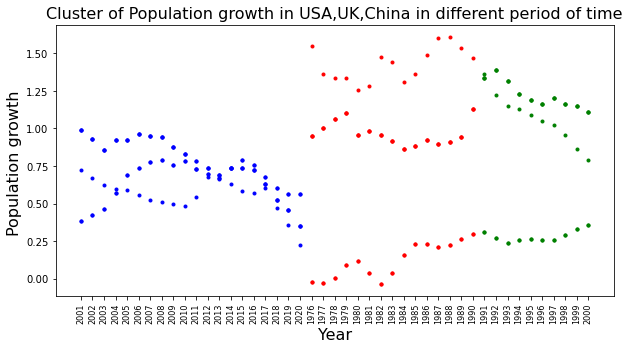

In [1335]:
################################# KMeansClustering  USA,UK,China #########################################

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Clu_slt_PL) 
       # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres
# plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green","purple"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_PL.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    plt.plot(Clu_slt_PL.iloc[: , :2][labels==l], "o", markersize=3, color=col[l])
    plt.plot(Clu_slt_PL.iloc[: , :3][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Cluster of Population growth in USA,UK,China in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Population growth ",fontsize=16)
plt.show()

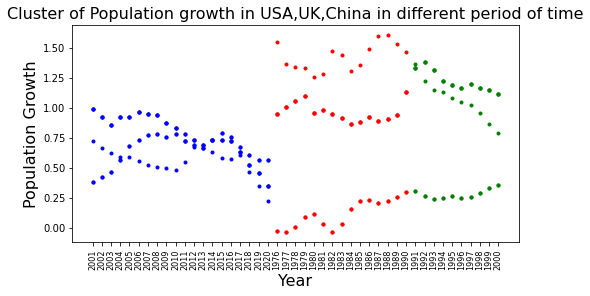

In [1336]:
################################ AgglomerativeClustering #################################
# set up the clusterer
ac = cluster.AgglomerativeClustering(n_clusters=3)

# carry out the fitting
ac.fit(Clu_slt_PL)

labels = ac.labels_
'''
# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(3):
    xc = np.average(x[labels==ic])
    yc = np.average(y[labels==ic])
    xcen.append(xc)
    ycen.append(yc)
print(xcen)
'''
# plot using the labels to select colour
plt.figure(figsize=(8.0,4.0))

col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_PL.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    plt.plot(Clu_slt_PL.iloc[: , :2][labels==l], "o", markersize=3, color=col[l])
    plt.plot(Clu_slt_PL.iloc[: , :3][labels==l], "o", markersize=3, color=col[l])
'''# show cluster centres
for ic in range(3):
    plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)
'''
plt.title("Cluster of Population growth in USA,UK,China in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)      
plt.xlabel("Year",fontsize=16)
plt.ylabel("Population Growth",fontsize=16)
plt.show()

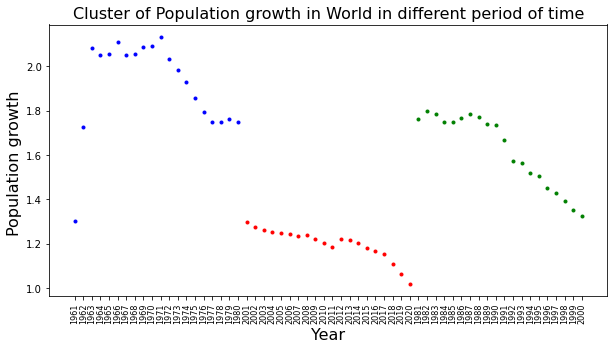

In [1344]:
slt_World_PL_tr['World'] = slt_World_PL_tr['World'].astype(float,errors = 'raise')

################################# KMeans Clustering  World #########################################

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(slt_World_PL_tr) 
       # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres
# plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(slt_World_PL_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
   
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Cluster of Population growth in World in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Population growth ",fontsize=16)
plt.show()

In [1365]:
################################ AgglomerativeClustering #################################
# set up the clusterer
ac = cluster.AgglomerativeClustering(n_clusters=3)

# carry out the fitting
ac.fit(slt_World_PL_tr)

labels = ac.labels_
"""
# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(3):
    xc = np.average(x[labels==ic])
    yc = np.average(y[labels==ic])
    xcen.append(xc)
    ycen.append(yc)
print(xcen)
"""
# plot using the labels to select colour
plt.figure(figsize=(10.0,4.0))

col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(slt_World_PL_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
   
'''# show cluster centres
for ic in range(3):
    plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)
'''
plt.title("Cluster of Population growth in World in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)      
plt.xlabel("Year",fontsize=16)
plt.ylabel("Population Growth",fontsize=16)
plt.show()

ValueError: Item wrong length 60 instead of 59.

In [1313]:
# define the exponential growth function
def exp_growth(t, scale, growth):
    f = scale * np.exp(growth * (t-1950))  #Computes exponential function with scale and growth as free parameters
    return f

# define the logistic function
def logistics(t, a, k, t0):
    f = a / (1.0 + np.exp(-k * (t - t0)))  #Computes logistics function with scale and incr as free parameters
    return f

# define the second degree polynomial function
def Second_degree_poly(x, a, b, c):
    return a * x + b * x**2 + c

# define the fifth degree polynomial function
def fifth_Degree_Polynomial(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

# define the sixth degree polynomial function
def sixth_Degree_Polynomial(x, a, b, c, d, e, f, g):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + (f * x**6) + g

# define the sixth degree polynomial function
def seventh_Degree_Polynomial(x, a, b, c, d, e, f, g):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + (f * x**6) + (g * x**7) + h


# define the true objective function
def sin_wave(x, a, b, c, d):
	return a * sin(b - x) + c * x**2 + d
 

In [1314]:
####################### Model fitting for Populationgrowth in USA ########################
new_header = slt_USA_PL_tr.iloc[0] #grab the first row for the header
slt_USA_PL_tr = slt_USA_PL_tr[1:] #take the data less the header row
slt_USA_PL_tr.columns = new_header

a_list = list(range(1961,2021))
slt_USA_PL_tr['Year'] = a_list #add year column



In [1315]:
######################### fit exponential growth #######################################3
popt, pcorr = opt.curve_fit(exp_growth, slt_USA_PL_tr["Year"], slt_USA_PL_tr["United States"], 
                            absolute_sigma=True, p0=[4e8, 0.01])

slt_USA_PL_tr["pop_exp"] = exp_growth(slt_USA_PL_tr["Year"], *popt)

########################### fit Logistics function ####################################
popt, pcorr = opt.curve_fit(logistics, slt_USA_PL_tr["Year"], slt_USA_PL_tr["United States"],
                            absolute_sigma=True,p0=(2e9, 0.05,100))

slt_USA_PL_tr["pop_logistic"] = logistics(slt_USA_PL_tr["Year"], *popt)

################### fit second degree polynomial #####################################
popt, pcorr = opt.curve_fit(Second_degree_poly, slt_USA_PL_tr["Year"], slt_USA_PL_tr["United States"],
                            absolute_sigma=True,p0=(2e9, 0.05, 2000.0))

slt_USA_PL_tr["pop_Sec_Poly"] = Second_degree_poly(slt_USA_PL_tr["Year"], *popt)


##################### fit fifth degree polynomial  #####################################
popt, pcorr = opt.curve_fit(fifth_Degree_Polynomial, slt_USA_PL_tr["Year"], slt_USA_PL_tr["United States"],
                            absolute_sigma=True)
slt_USA_PL_tr["pop_fifth_Poly"] = fifth_Degree_Polynomial(slt_USA_PL_tr["Year"], *popt)

##################### fit sixtth degree polynomial  ###################################
popt, pcorr = opt.curve_fit(sixth_Degree_Polynomial, slt_USA_PL_tr["Year"], slt_USA_PL_tr["United States"],
                            absolute_sigma=True)
slt_USA_PL_tr["pop_sixth_Poly"] = sixth_Degree_Polynomial(slt_USA_PL_tr["Year"], *popt)





C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


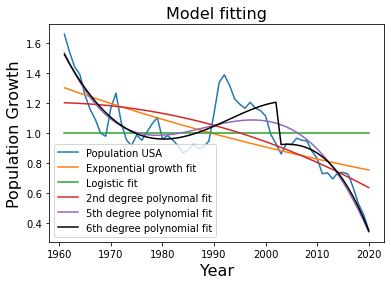

Population growth of USA in future:
Year:2030 Population growth is 0.11847476952243596 (annual %).
Year:2040 Population growth is -2.55248765880242 (annual %)
Year:2050 Population growth is -7.0298005022341385 (annual %)


In [1316]:
#plot
plt.figure()
plt.plot(slt_USA_PL_tr["Year"], slt_USA_PL_tr["United States"], label="Population USA")
plt.plot(slt_USA_PL_tr["Year"], slt_USA_PL_tr["pop_exp"], label="Exponential growth fit")
plt.plot(slt_USA_PL_tr["Year"], slt_USA_PL_tr["pop_logistic"], label="Logistic fit")
plt.plot(slt_USA_PL_tr["Year"], slt_USA_PL_tr["pop_Sec_Poly"], label="2nd degree polynomal fit")
plt.plot(slt_USA_PL_tr["Year"], slt_USA_PL_tr["pop_fifth_Poly"], label="5th degree polynomial fit")
plt.plot(slt_USA_PL_tr["Year"], slt_USA_PL_tr["pop_sixth_Poly"], label="6th degree polynomial fit", c="black")

plt.legend()
plt.title("Model fitting",fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Population Growth",fontsize=16)
plt.show()

############# predict the future population growth ###################
print("Population growth of USA in future:")
print("Year:2030 Population growth is", sixth_Degree_Polynomial(2030, *popt) , "(annual %).")
print("Year:2040 Population growth is", sixth_Degree_Polynomial(2040, *popt) , "(annual %)")
print("Year:2050 Population growth is", sixth_Degree_Polynomial(2050, *popt) , "(annual %)")



In [1317]:
####################### Model fitting for Populationgrowth in UK ########################
new_header = slt_UK_PL_tr.iloc[0] #grab the first row for the header
slt_UK_PL_tr = slt_UK_PL_tr[1:] #take the data less the header row
slt_UK_PL_tr.columns = new_header

a_list = list(range(1961,2021))
slt_UK_PL_tr['Year'] = a_list #add year column

# COnvert the objects to float dtype
slt_UK_PL_tr['United Kingdom'] = slt_UK_PL_tr['United Kingdom'].astype(float,errors = 'raise')

C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


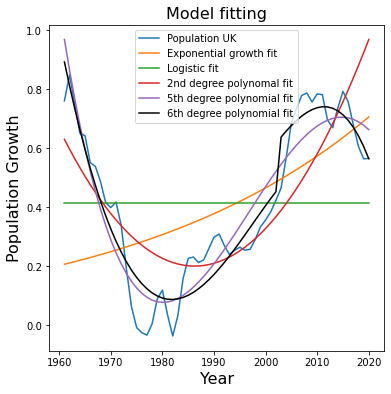

Population Growth of UK in future:
Year:2030 Population growth is -0.9378262717509642 (annual %).
Year:2040 Population growth is -2.8622298350092024 (annual %).
Year:2050 Population growth is -6.319618524052203 (annual %).


In [1318]:
######################### fit exponential growth #######################################3
popt, pcorr = opt.curve_fit(exp_growth, slt_UK_PL_tr["Year"], slt_UK_PL_tr["United Kingdom"],
                            absolute_sigma=True,p0=[4e8, 0.01])

slt_UK_PL_tr["pop_exp"] = exp_growth(slt_UK_PL_tr["Year"], *popt)


########################### fit Logistics function ####################################
popt, pcorr = opt.curve_fit(logistics, slt_UK_PL_tr["Year"], slt_UK_PL_tr["United Kingdom"],
                            absolute_sigma=True,p0=(2e9, 0.05,100))

slt_UK_PL_tr["pop_logistic"] = logistics(slt_UK_PL_tr["Year"], *popt)

################### fit second degree polynomial #####################################
popt, pcorr = opt.curve_fit(Second_degree_poly, slt_UK_PL_tr["Year"], slt_UK_PL_tr["United Kingdom"],
                            absolute_sigma=True,p0=(2e9, 0.05, 2000.0))

slt_UK_PL_tr["pop_Sec_Poly"] = Second_degree_poly(slt_UK_PL_tr["Year"], *popt)

##################### fit fifth degree polynomial  #####################################
popt, pcorr = opt.curve_fit(fifth_Degree_Polynomial, slt_UK_PL_tr["Year"], slt_UK_PL_tr["United Kingdom"],
                            absolute_sigma=True)
slt_UK_PL_tr["pop_fifth_Poly"] = fifth_Degree_Polynomial(slt_UK_PL_tr["Year"], *popt)

##################### fit Sixth degree polynomial ######################
popt, pcorr = opt.curve_fit(sixth_Degree_Polynomial, slt_UK_PL_tr["Year"], slt_UK_PL_tr["United Kingdom"],
                            absolute_sigma=True)
slt_UK_PL_tr["pop_sixth_Poly"] = sixth_Degree_Polynomial(slt_UK_PL_tr["Year"], *popt)

#plot
plt.figure(figsize=(6.0,6.0))
plt.plot(slt_UK_PL_tr["Year"], slt_UK_PL_tr["United Kingdom"], label="Population UK")
plt.plot(slt_UK_PL_tr["Year"], slt_UK_PL_tr["pop_exp"], label="Exponential growth fit")
plt.plot(slt_UK_PL_tr["Year"], slt_UK_PL_tr["pop_logistic"], label="Logistic fit")
plt.plot(slt_UK_PL_tr["Year"], slt_UK_PL_tr["pop_Sec_Poly"], label="2nd degree polynomal fit")
plt.plot(slt_UK_PL_tr["Year"], slt_UK_PL_tr["pop_fifth_Poly"], label="5th degree polynomial fit")
plt.plot(slt_UK_PL_tr["Year"], slt_UK_PL_tr["pop_sixth_Poly"], label="6th degree polynomial fit", c="black")

plt.legend()
plt.title("Model fitting",fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Population Growth",fontsize=16)
plt.show()

############# predict the future population growth ###################
print("Population Growth of UK in future:")
print("Year:2030 Population growth is", sixth_Degree_Polynomial(2030, *popt) , "(annual %).")
print("Year:2040 Population growth is", sixth_Degree_Polynomial(2040, *popt) , "(annual %).")
print("Year:2050 Population growth is", sixth_Degree_Polynomial(2050, *popt) , "(annual %).")


In [1319]:
####################### Model fitting for Populationgrowth in China ########################
new_header = slt_China_PL_tr.iloc[0] #grab the first row for the header
slt_China_PL_tr = slt_China_PL_tr[1:] #take the data less the header row
slt_China_PL_tr.columns = new_header

a_list = list(range(1961,2021))
slt_China_PL_tr['Year'] = a_list #add year column

# COnvert the objects to float dtype
slt_China_PL_tr['China'] = slt_China_PL_tr['China'].astype(float,errors = 'raise')

In [1363]:
######################### fit exponential growth #######################################3
popt, pcorr = opt.curve_fit(exp_growth, slt_China_PL_tr["Year"], slt_China_PL_tr["China"], 
                            absolute_sigma=True, p0=[4e8, 0.01])

slt_China_PL_tr["pop_exp"] = exp_growth(slt_China_PL_tr["Year"], *popt)

########################### fit Logistics function ####################################
popt, pcorr = opt.curve_fit(logistics, slt_China_PL_tr["Year"], slt_China_PL_tr["China"],
                            absolute_sigma=True,p0=(2e9, 0.05,100))

slt_China_PL_tr["pop_logistic"] = logistics(slt_China_PL_tr["Year"], *popt)

################### fit second degree polynomial #####################################
popt, pcorr = opt.curve_fit(Second_degree_poly, slt_China_PL_tr["Year"], slt_China_PL_tr["China"],
                            absolute_sigma=True,p0=(2e9, 0.05, 2000.0))

slt_China_PL_tr["pop_Sec_Poly"] = Second_degree_poly(slt_China_PL_tr["Year"], *popt)

##################### fit fifth degree polynomial  #####################################
popt, pcorr = opt.curve_fit(fifth_Degree_Polynomial, slt_China_PL_tr["Year"], slt_China_PL_tr["China"],
                            absolute_sigma=True)
slt_China_PL_tr["pop_fifth_Poly"] = fifth_Degree_Polynomial(slt_China_PL_tr["Year"], *popt)

##################### fit Sixth degree polynomial ######################
popt, pcorr = opt.curve_fit(sixth_Degree_Polynomial, slt_China_PL_tr["Year"], slt_China_PL_tr["China"],
                            absolute_sigma=True,p0=(2e9, 0.05, 100.0,2e2, 0.05, 200.0,0.01))
slt_China_PL_tr["pop_sixth_Poly"] = sixth_Degree_Polynomial(slt_China_PL_tr["Year"], *popt)


C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


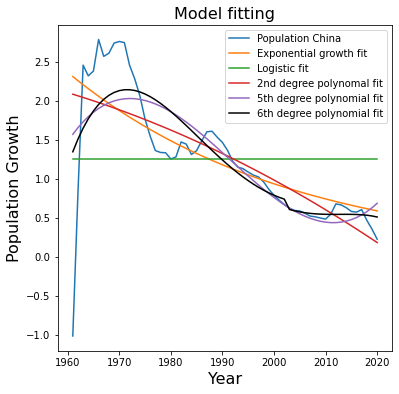

Population Growth of China in Future:
Year:2030 Population growth is 0.4213535934686661 (annual %).
Year:2040 Population growth is -1.6151029616594315 (annual %).
Year:2050 Population growth is -6.528780061751604 (annual %).


In [1364]:
#plot
plt.figure(figsize=(6.0,6.0))
plt.plot(slt_China_PL_tr["Year"], slt_China_PL_tr["China"], label="Population China")
plt.plot(slt_China_PL_tr["Year"], slt_China_PL_tr["pop_exp"], label="Exponential growth fit")
plt.plot(slt_China_PL_tr["Year"], slt_China_PL_tr["pop_logistic"], label="Logistic fit")
plt.plot(slt_China_PL_tr["Year"], slt_China_PL_tr["pop_Sec_Poly"], label="2nd degree polynomal fit")
plt.plot(slt_China_PL_tr["Year"], slt_China_PL_tr["pop_fifth_Poly"], label="5th degree polynomial fit")
plt.plot(slt_China_PL_tr["Year"], slt_China_PL_tr["pop_sixth_Poly"], label="6th degree polynomial fit", c="black")

plt.legend()
plt.title("Model fitting",fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Population Growth",fontsize=16)
plt.show()

############# predict the future population growth ###################
print("Population Growth of China in Future:")
print("Year:2030 Population growth is", sixth_Degree_Polynomial(2030, *popt) , "(annual %).")
print("Year:2040 Population growth is", sixth_Degree_Polynomial(2040, *popt) , "(annual %).")
print("Year:2050 Population growth is", sixth_Degree_Polynomial(2050, *popt) , "(annual %).")


In [1322]:
####################### Model fitting for Populationgrowth in World ########################
new_header = slt_World_PL_tr.iloc[0] #grab the first row for the header
slt_World_PL_tr = slt_World_PL_tr[1:] #take the data less the header row
slt_World_PL_tr.columns = new_header

a_list = list(range(1961,2021))
slt_World_PL_tr['Year'] = a_list #add year column

# COnvert the objects to float dtype
slt_World_PL_tr['World'] = slt_World_PL_tr['World'].astype(float,errors = 'raise')

In [1323]:
######################### fit exponential growth #######################################3
popt, pcorr = opt.curve_fit(exp_growth, slt_World_PL_tr["Year"], slt_World_PL_tr["World"], 
                            absolute_sigma=True, p0=[4e8, 0.01])

slt_World_PL_tr["pop_exp"] = exp_growth(slt_World_PL_tr["Year"], *popt)

########################### fit Logistics function ####################################
popt, pcorr = opt.curve_fit(logistics, slt_World_PL_tr["Year"], slt_World_PL_tr["World"],
                            absolute_sigma=True,p0=(2e9, 0.05,100))

slt_World_PL_tr["pop_logistic"] = logistics(slt_World_PL_tr["Year"], *popt)

################### fit second degree polynomial #####################################
popt, pcorr = opt.curve_fit(Second_degree_poly, slt_World_PL_tr["Year"], slt_World_PL_tr["World"],
                            absolute_sigma=True,p0=(2e9, 0.05, 2000.0))

slt_World_PL_tr["pop_Sec_Poly"] = Second_degree_poly(slt_World_PL_tr["Year"], *popt)

##################### fit fifth degree polynomial  #####################################
popt, pcorr = opt.curve_fit(fifth_Degree_Polynomial, slt_World_PL_tr["Year"], slt_World_PL_tr["World"],
                            absolute_sigma=True)
slt_World_PL_tr["pop_fifth_Poly"] = fifth_Degree_Polynomial(slt_World_PL_tr["Year"], *popt)

##################### fit Sixth degree polynomial ######################
popt, pcorr = opt.curve_fit(sixth_Degree_Polynomial, slt_World_PL_tr["Year"], slt_World_PL_tr["World"],
                            absolute_sigma=True,p0=(2e6, 0.01, 1000.0,2e4, 0.05, 1000.0,0.01))
slt_World_PL_tr["pop_sixth_Poly"] = sixth_Degree_Polynomial(slt_World_PL_tr["Year"], *popt)


C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


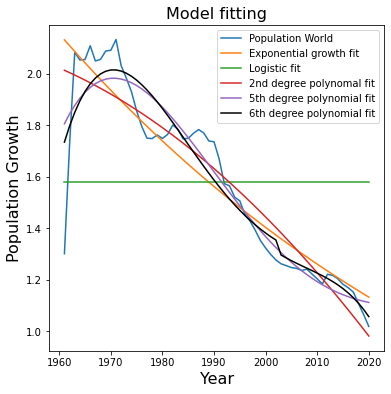

Population Growth of World in Future:  
Year:2030 Population growth is 0.6753530828282237 (annual %).
Year:2040 Population growth is -0.8076042262837291 (annual %).
Year:2050 Population growth is -3.9170041028410196 (annual %).


In [1324]:
#plot
plt.figure(figsize=(6.0,6.0))
plt.plot(slt_World_PL_tr["Year"], slt_World_PL_tr["World"], label="Population World")
plt.plot(slt_World_PL_tr["Year"], slt_World_PL_tr["pop_exp"], label="Exponential growth fit")
plt.plot(slt_World_PL_tr["Year"], slt_World_PL_tr["pop_logistic"], label="Logistic fit")
plt.plot(slt_World_PL_tr["Year"], slt_World_PL_tr["pop_Sec_Poly"], label="2nd degree polynomal fit")
plt.plot(slt_World_PL_tr["Year"], slt_World_PL_tr["pop_fifth_Poly"], label="5th degree polynomial fit")
plt.plot(slt_World_PL_tr["Year"], slt_World_PL_tr["pop_sixth_Poly"], label="6th degree polynomial fit", c="black")

plt.legend()
plt.title("Model fitting",fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Population Growth",fontsize=16)
plt.show()

############# predict the future population growth ###################
print("Population Growth of World in Future:  ")
print("Year:2030 Population growth is", sixth_Degree_Polynomial(2030, *popt) , "(annual %).")
print("Year:2040 Population growth is", sixth_Degree_Polynomial(2040, *popt) , "(annual %).")
print("Year:2050 Population growth is", sixth_Degree_Polynomial(2050, *popt) , "(annual %).")


In [1401]:
####################### Model fitting for Populationgrowth in Syria ########################
new_header = slt_Syria_PL_tr.iloc[0] #grab the first row for the header
slt_Syria_PL_tr = slt_Syria_PL_tr[1:] #take the data less the header row
slt_Syria_PL_tr.columns = new_header

slt_Syria_PL_tr['Syrian Arab Republic'].dropna().unique()


array([3.19279412941748, 3.19983220613328, 3.21337249088478,
       3.23823748735007, 3.26877089209022, 3.29708924499675,
       3.31987007737945, 3.34287334989698, 3.36604226235354,
       3.38698198989791, 3.4104091237803, 3.4299806886758,
       3.43597700356721, 3.42635706361853, 3.40860007646348,
       3.37849091812641, 3.35558192782465, 3.36395410274082,
       3.41113199412899, 3.47579816934946, 3.54287552667389,
       3.58124103564448, 3.57070662084359, 3.50171948560889,
       3.39628112124826, 3.2852124805409, 3.1889406479423,
       3.1043859084066, 3.0370615427571, 2.98252514626845,
       2.92347883820415, 2.86346535693715, 2.82161749915953,
       2.80159450585545, 2.79213304313577, 2.80885867882283,
       2.81453696901682, 2.75748703703718, 2.62183364371107,
       2.44796785515457, 2.14436097366638, 1.87929834690516,
       1.91650801550182, 2.34163592008515, 2.94779931535795,
       3.73143709504919, 4.20736060236829, 3.87683250172363,
       2.58833252690427, 0.736

In [1402]:
slt_Syria_PL_tr

Country Name,Syrian Arab Republic
1961,3.192794
1962,3.199832
1963,3.213372
1964,3.238237
1965,3.268771
1966,3.297089
1967,3.31987
1968,3.342873
1969,3.366042
1970,3.386982


In [1407]:
a_list = list(range(1961,2021))
slt_Syria_PL_tr['Year'] = a_list #add year column

# COnvert the objects to float dtype
slt_Syria_PL_tr['Syrian Arab Republic'] = slt_Syria_PL_tr['Syrian Arab Republic'].astype(float,errors = 'raise')
slt_Syria_PL_tr

<ipython-input-1407-303a9d333ab7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slt_Syria_PL_tr['Year'] = a_list #add year column
<ipython-input-1407-303a9d333ab7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slt_Syria_PL_tr['Syrian Arab Republic'] = slt_Syria_PL_tr['Syrian Arab Republic'].astype(float,errors = 'raise')


Country Name,Syrian Arab Republic,Year
1961,3.192794,1961
1962,3.199832,1962
1963,3.213372,1963
1964,3.238237,1964
1965,3.268771,1965
1966,3.297089,1966
1967,3.319870,1967
1968,3.342873,1968
1969,3.366042,1969
1970,3.386982,1970


In [1463]:
######################### fit exponential growth #######################################3
popt, pcorr = opt.curve_fit(exp_growth, slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["Syrian Arab Republic"], 
                            absolute_sigma=True, p0=[4e8, 0.01])

slt_Syria_PL_tr["pop_exp"] = exp_growth(slt_Syria_PL_tr["Year"], *popt)

########################### fit Logistics function ####################################
popt, pcorr = opt.curve_fit(logistics, slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["Syrian Arab Republic"],
                            absolute_sigma=True,p0=(2e9, 0.05,100))

slt_Syria_PL_tr["pop_logistic"] = logistics(slt_Syria_PL_tr["Year"], *popt)

################### fit second degree polynomial #####################################
popt, pcorr = opt.curve_fit(Second_degree_poly, slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["Syrian Arab Republic"],
                            absolute_sigma=True,p0=(2e9, 0.05, 2000.0))

slt_Syria_PL_tr["pop_Sec_Poly"] = Second_degree_poly(slt_Syria_PL_tr["Year"], *popt)

##################### fit fifth degree polynomial  #####################################
popt, pcorr = opt.curve_fit(fifth_Degree_Polynomial, slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["Syrian Arab Republic"],
                            absolute_sigma=True)
slt_Syria_PL_tr["pop_fifth_Poly"] = fifth_Degree_Polynomial(slt_Syria_PL_tr["Year"], *popt)

##################### fit Sixth degree polynomial ######################
popt, pcorr = opt.curve_fit(sixth_Degree_Polynomial, slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["Syrian Arab Republic"],
                            absolute_sigma=True,p0=(2e3, 0.01, 1000.0,2e3, 0.01, 100.0,2e10))
slt_Syria_PL_tr["pop_sixth_Poly"] = sixth_Degree_Polynomial(slt_Syria_PL_tr["Year"], *popt)


<ipython-input-1463-978f0709ad11>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slt_Syria_PL_tr["pop_exp"] = exp_growth(slt_Syria_PL_tr["Year"], *popt)
C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-1463-978f0709ad11>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slt_Syria_PL_tr["pop_logistic"] = logistics(slt_Syria_PL_tr["Year"], *p

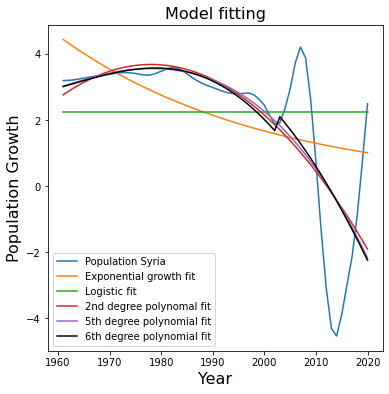

In [1464]:
plt.figure(figsize=(6.0,6.0))
plt.plot(slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["Syrian Arab Republic"], label="Population Syria")
plt.plot(slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["pop_exp"], label="Exponential growth fit")
plt.plot(slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["pop_logistic"], label="Logistic fit")
plt.plot(slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["pop_Sec_Poly"], label="2nd degree polynomal fit")
plt.plot(slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["pop_fifth_Poly"], label="5th degree polynomial fit")
plt.plot(slt_Syria_PL_tr["Year"], slt_Syria_PL_tr["pop_sixth_Poly"], label="6th degree polynomial fit", c="black")

plt.legend()
plt.title("Model fitting",fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Population Growth",fontsize=16)
plt.show()
